# Use Case : German Credit Risk *(Clustering)*

The link to the original dataset can be found below .[Dataset](https://www.kaggle.com/uciml/german-credit)
<br>
<br>
The original dataset contains 1000 entries with 20 categorial /symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank.

* * * 

In [257]:
# Import the Package for Load the Data
import pandas as pd
import numpy as np

In [258]:
# Import Data
credit = pd.read_csv('german-credit-risk/german_credit_data.csv')
credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


## Exploration Data Analysis (EDA)
Before we analyze the data, we need to understand about the data that we want to analyze first. 

In [259]:
# Dimension of Data
credit.shape

(1000, 10)

In [260]:
# Delete Column (Not Useful)
credit = credit.drop(['Unnamed: 0'],axis=1)
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [261]:
# Variable's Character
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [262]:
# Import the Package for Make the Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

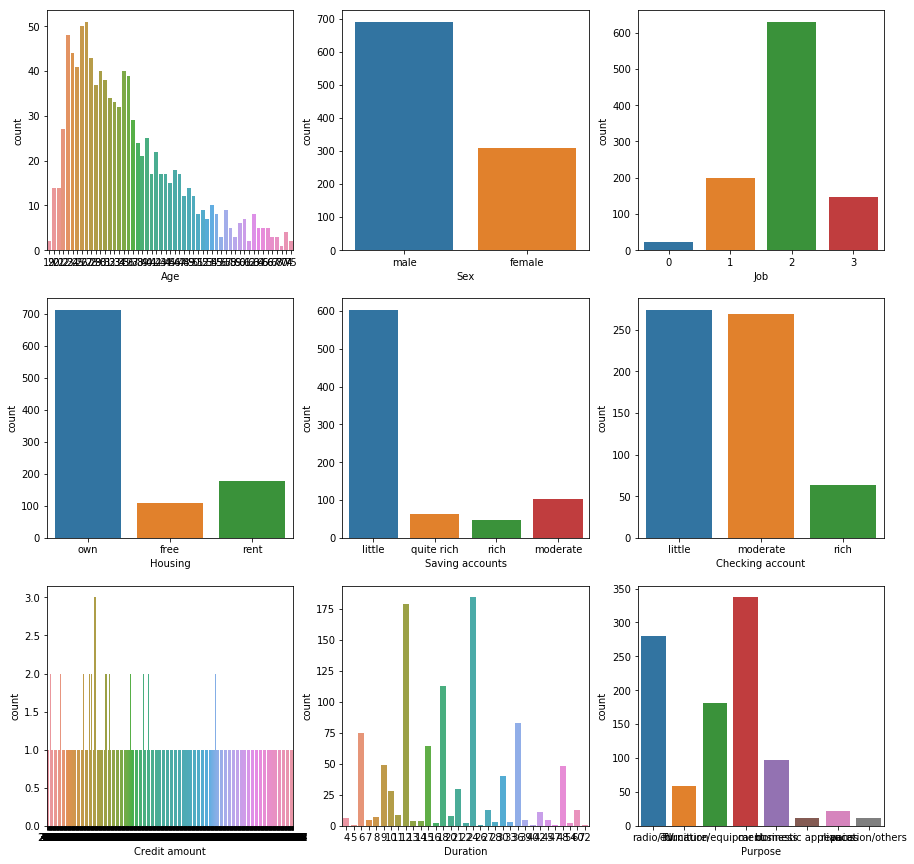

In [263]:
# Know the character every data from Bar Plot
f=plt.figure(figsize=(15,15))
f.add_subplot(3,3,1)
sns.countplot(credit['Age'])
f.add_subplot(3,3,2)
sns.countplot(credit['Sex'])
f.add_subplot(3,3,3)
sns.countplot(credit['Job'])
f.add_subplot(3,3,4)
sns.countplot(credit['Housing'])
f.add_subplot(3,3,5)
sns.countplot(credit['Saving accounts'])
f.add_subplot(3,3,6)
sns.countplot(credit['Checking account'])
f.add_subplot(3,3,7)
sns.countplot(credit['Credit amount'])
f.add_subplot(3,3,8)
sns.countplot(credit['Duration'])
f.add_subplot(3,3,9)
sns.countplot(credit['Purpose'])

From the **Bar Plot** we know that from 9 variable there are 3 numerical variable (Age, Credit Amount and Duration) and 6 categorical variable (Sex, Job, Housing, Saving Accounts, Checking Account and Purpose). 
<br>
<br>
If we see variable's character in *credit.info()*, Job variable is indicating as integer. So we need to convert job variable from integer type to object type  

In [264]:
credit['Job'] = credit.Job.astype(str)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null object
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


After we make sure the data type already appropriate, we can continue to the next step.
***

## Missing Value Detection
Before we analyze the data, we need to make sure the data that we want to analyze there are no missing.

In [265]:
# Count how many missing values per field
df_null = credit.isnull().sum().sort_values(ascending = False).head(3)
df_null

Checking account    394
Saving accounts     183
Purpose               0
dtype: int64

In [266]:
# Detect the percentage of missing value (1000 is row of data)
print('% Missing value of Checking account =', round(df_null[0]/1000 * 100))
print('% Missing value of Saving accounts =', round(df_null[1]/1000 * 100))

% Missing value of Checking account = 39.0
% Missing value of Saving accounts = 18.0


Using missing valued detection, there are two variable that missing (*Checking account* and *Saving account*). The percentage of missing value is lower than 60%, so we can imputation the missing. Both of variable that missing is categorical, so we can impute using mode.

**Separate data become numerical and categorical data**

In [267]:
numerik = ['Age', 'Credit amount','Duration']
categorical = credit.drop(numerik, axis=1)
numerical = credit[numerik]

In [268]:
for cat in categorical :
    modus = categorical[cat].mode().values[0]
    categorical[cat] = categorical[cat].fillna(modus)
categorical.isnull().sum().sort_values(ascending = False)

Purpose             0
Checking account    0
Saving accounts     0
Housing             0
Job                 0
Sex                 0
dtype: int64

***
## Outlier Detection
Not only check the missing value of the data, need to check the outlier for numerical data using box plot.

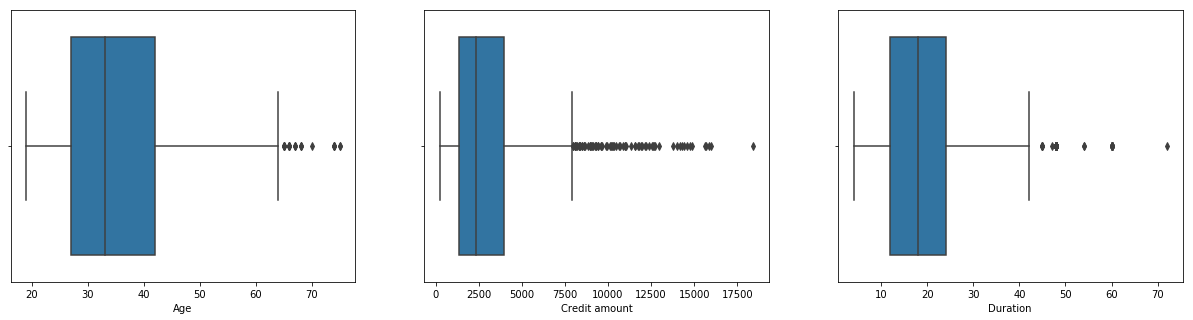

In [269]:
f = plt.figure(figsize=(21,5))
axes = 130
for num in numerical :
    axes += 1
    f.add_subplot(axes)
    sns.boxplot(data = numerical, x = num)
plt.show()

From all numerical data that we see from the **Box Plot**, there are *outlier* in each variable. So when we want to analyze we can transformation or normalize the variable. I think that three variables is important to anlyze, that's why that variable is still be use.  

***
## Visualization
We can visualization the daa based on univariate and multivariate analysis. In each part, we can use the appropriate graph taht we can find the better information.
1. Univariate Analysis (Categrorical : Bar Plot, Pie Char & Numerical : Distribution Plot, Violin Plot)
2. Multivariate Analysis (Correlation Plot, Scatter Plot, Pair Plot)

### 1. Univariate Analysis
** Bar Plot**

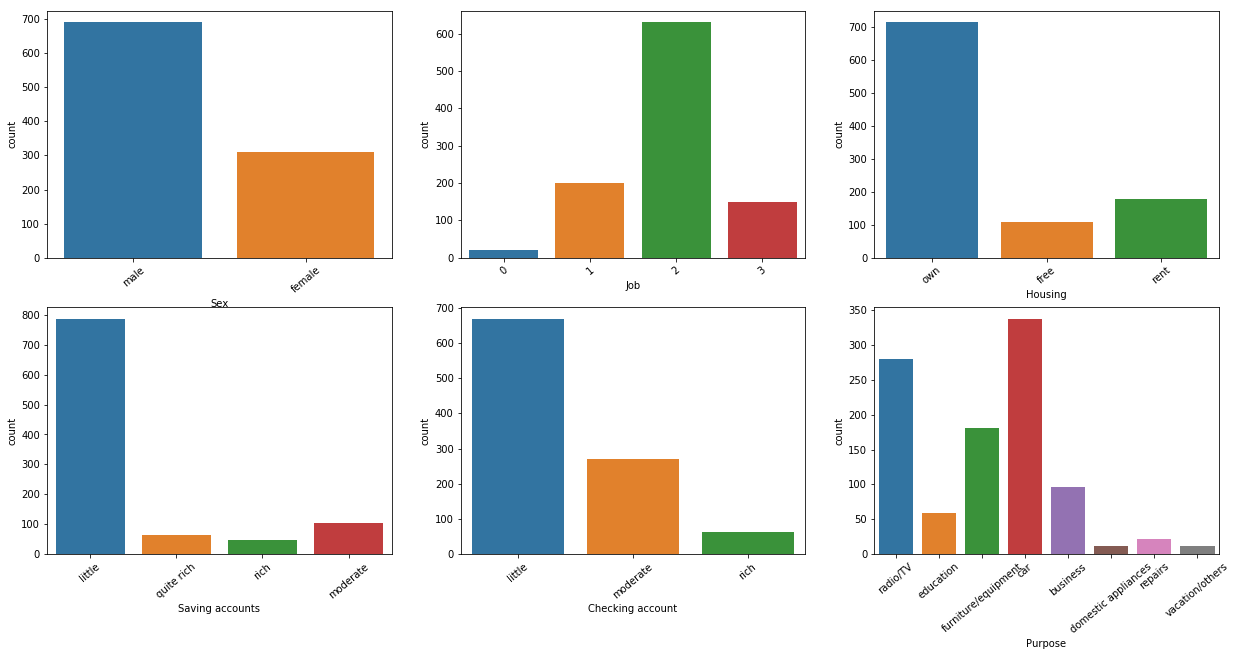

In [270]:
# Make Bar Plot for Each Categorical Data
f = plt.figure(figsize=(21,10))
axes = 230
for num in categorical :
    axes += 1
    f.add_subplot(axes)
    sns.countplot(data = categorical, x = num)
    plt.xticks(rotation=40)
plt.show()

By using the visualization using the **Bar Plot**, it can be known to the number or * count * of each category in each category variable.
<br>
#### Pie Chart
To know the percentage of each category categorics data, we can use **Pie Chart**

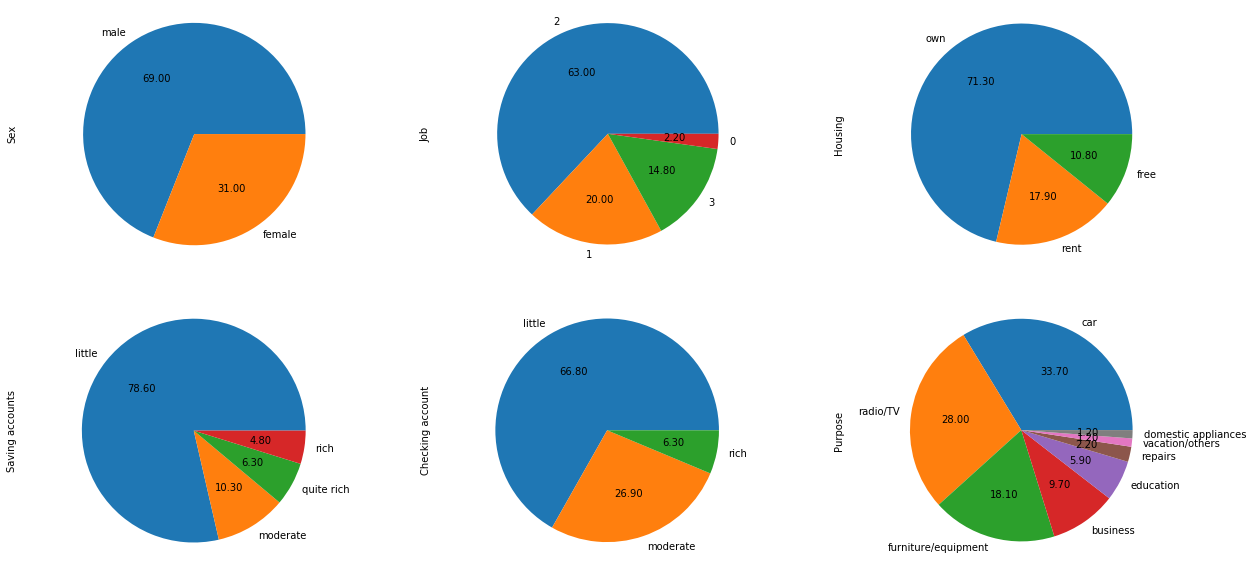

In [16]:
# Make Pie chart for Each Categorical Data
f = plt.figure(figsize=(21,10))
f.add_subplot(2,3,1)
categorical['Sex'].value_counts().plot.pie(autopct = '%.2f' )
plt.axis('equal')
f.add_subplot(2,3,2)
categorical['Job'].value_counts().plot.pie(autopct = '%.2f' ) 
plt.axis('equal')
f.add_subplot(2,3,3)
categorical['Housing'].value_counts().plot.pie(autopct = '%.2f' ) 
plt.axis('equal')
f.add_subplot(2,3,4)
categorical['Saving accounts'].value_counts().plot.pie(autopct = '%.2f' ) 
plt.axis('equal')
f.add_subplot(2,3,5)
categorical['Checking account'].value_counts().plot.pie(autopct = '%.2f' ) 
plt.axis('equal')
f.add_subplot(2,3,6)
categorical['Purpose'].value_counts().plot.pie(autopct = '%.2f' ) 
plt.axis('equal')
plt.show()

#### Distribution Plot 

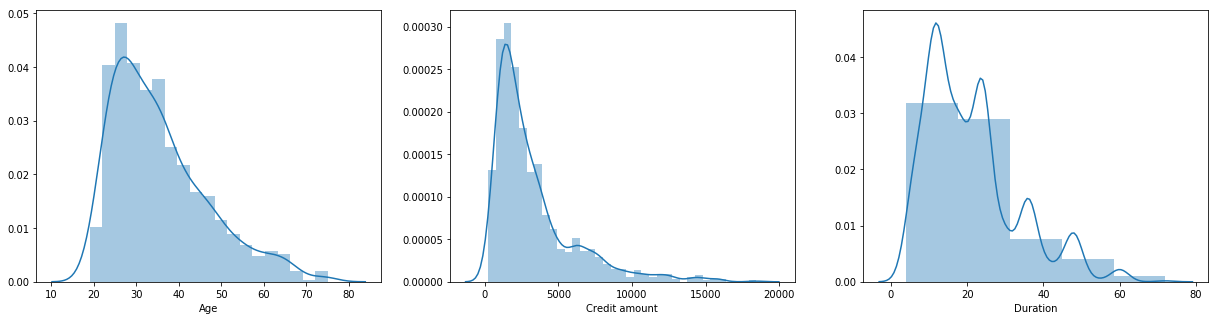

In [17]:
# Make Distribution Plot for Each Numerical Data
f=plt.figure(figsize=(21,5))
f.add_subplot(1,3,1)
sns.distplot(numerical['Age'])
f.add_subplot(1,3,2)
sns.distplot(numerical['Credit amount'])
f.add_subplot(1,3,3)
sns.distplot(numerical['Duration'], bins = 5)
plt.show()

Menggunakan **Distribution Plot** dapat diketahui distribusi dari setiap variabel numerik. Dapat diketahui dari ke-tiga variabel numerik bahwa memiliki pola *positive skewness*. Hal teresebut diduga dipengaruhi oleh banyaknya data yang outlier. Untuk melihat distribusi data dengan mengetahui pemusatan dari data, dapat divisualisaikan menggunakan **Violin Plot** berikut.

#### Violin PLot

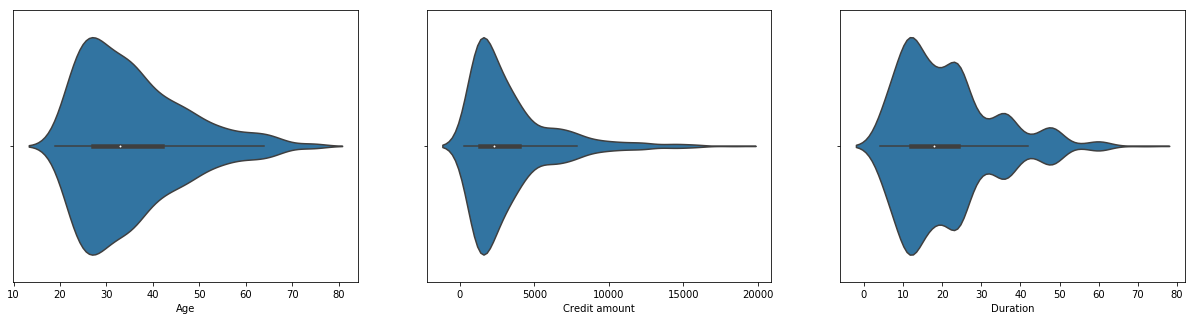

In [18]:
# Make Violin Plot for Each Numerical Data
f=plt.figure(figsize=(21,5))
f.add_subplot(1,3,1)
sns.violinplot(numerical['Age'])
f.add_subplot(1,3,2)
sns.violinplot(numerical['Credit amount'])
f.add_subplot(1,3,3)
sns.violinplot(numerical['Duration'], bins = 5)
plt.show()

### 2. Multivariate Analysis

#### Correlation Plot

In [19]:
data = pd.concat([numerical, categorical], axis = 1)
data.head()

,Age,Credit amount,Duration,Sex,Job,Housing,Saving accounts,Checking account,Purpose
0,67,1169,6,male,2,own,little,little,radio/TV
1,22,5951,48,female,2,own,little,moderate,radio/TV
2,49,2096,12,male,1,own,little,little,education
3,45,7882,42,male,2,free,little,little,furniture/equipment
4,53,4870,24,male,2,free,little,little,car


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null object
Housing             1000 non-null object
Saving accounts     1000 non-null object
Checking account    1000 non-null object
Purpose             1000 non-null object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


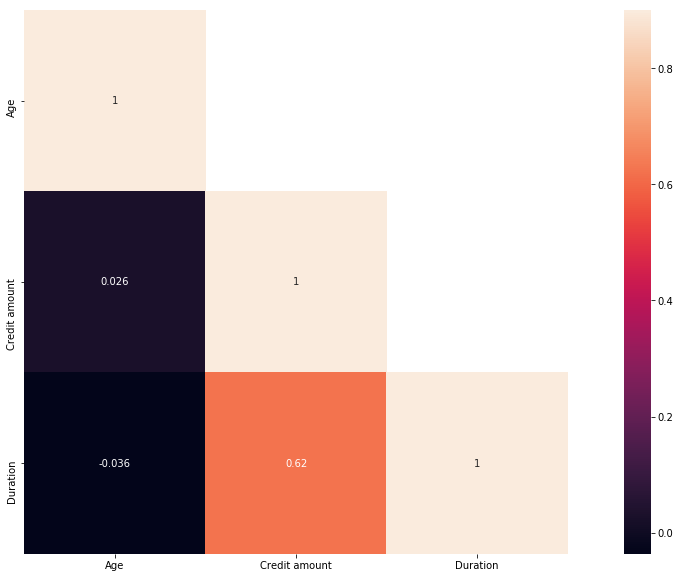

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

plt.figure(figsize=(5,5))
#create correlation
corr = data.corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)
plt.show()

Based on **Correlation Plot**, it can be seen that the correlation between *Duration* and *Credit Amount* has the highest correlation with a correlation value of 0.62. Meanwhile, if you see the correlation between *Duration* and *Age*, it can be seen to have a negative correlation with a correlation value of 0.03. While the correlation value *Age* and *Credit amount* has the smallest correlation value when compared with correlations between other numerical variables.
<br>
We have obtained the heatmap of correlation among the variables.  The color palette in the side represents the amount of correlation among the variables. The lighter shade represents high correlation. We can see that happiness score is highly correlated with GDP per capita, family and life expectancy. It is least correlated with generosity.


#### Scatter Plot
Bassed on Correlation Plot, we can know patterns between variables using **Scatter Plot**.

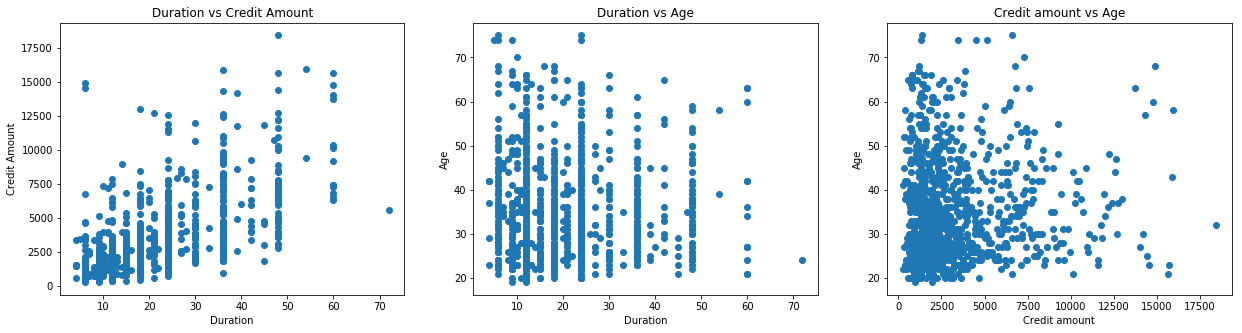

In [186]:
f=plt.figure(figsize=(21,5))
f.add_subplot(1,3,1)
plt.scatter(x=data['Duration'],y=data['Credit amount'])
plt.title('Duration vs Credit Amount')
plt.xlabel('Duration')
plt.ylabel('Credit Amount')
f.add_subplot(1,3,2)
plt.scatter(x=data['Duration'],y=data['Age'])
plt.title('Duration vs Age')
plt.xlabel('Duration')
plt.ylabel('Age')
f.add_subplot(1,3,3)
plt.scatter(x=data['Credit amount'],y=data['Age'])
plt.title('Credit amount vs Age')
plt.xlabel('Credit amount')
plt.ylabel('Age')
plt.show()

Based on **Scatter Plot**, we know the plot based on two numerical variable. From the correlation score, Duration and Credit Amount have a big correlation. That's why we can see the plot is tilt right up.

#### Pair Plot
From **Pair Plot** we can see the characteristics of data, compare two numerical data and one categorical data.

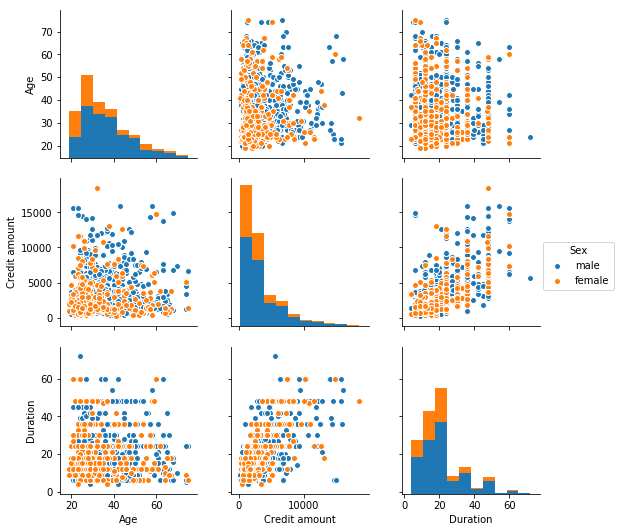

In [25]:
sns.pairplot(data[["Age", "Credit amount", "Duration", "Sex"]], hue="Sex", diag_kind="hist")
plt.show()

As we know, male costumer is higher than female. When we compare with numerical data, male or female gender is spread evently.  

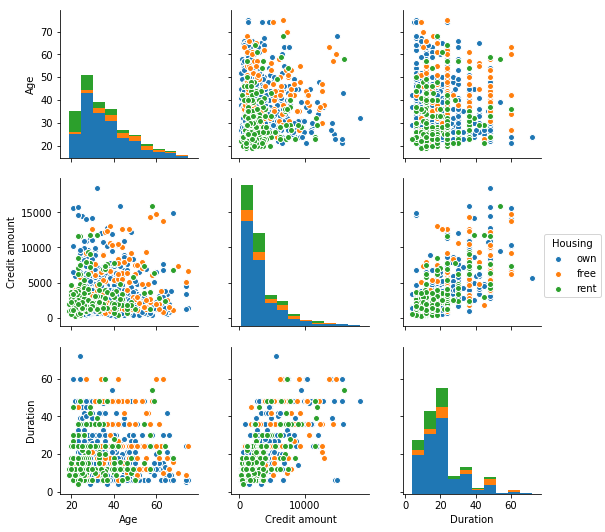

In [26]:
sns.pairplot(data[["Age", "Credit amount", "Duration", "Housing"]], hue="Housing", diag_kind="hist")
plt.show()

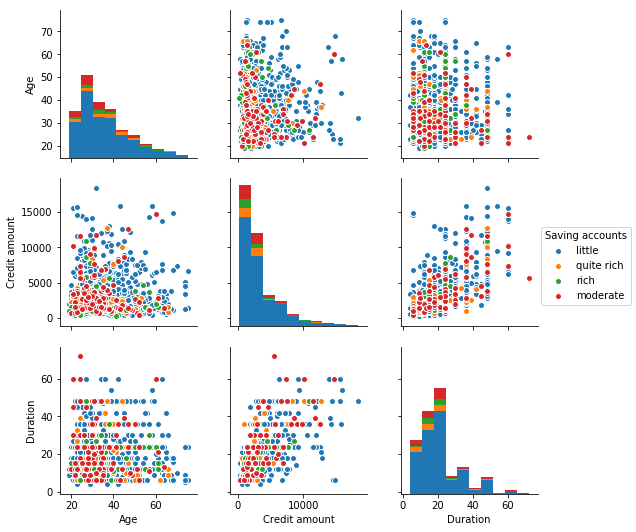

In [27]:
sns.pairplot(data[["Age", "Credit amount", "Duration", "Saving accounts"]], hue="Saving accounts", diag_kind="hist")
plt.show()

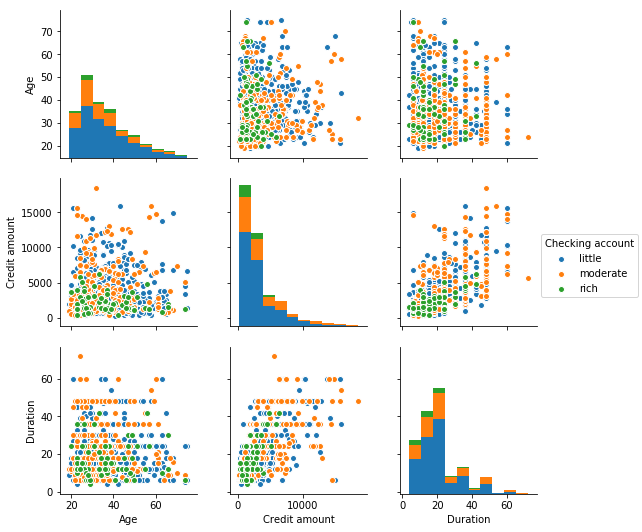

In [28]:
sns.pairplot(data[["Age", "Credit amount", "Duration", "Checking account"]], hue="Checking account", diag_kind="hist")
plt.show()

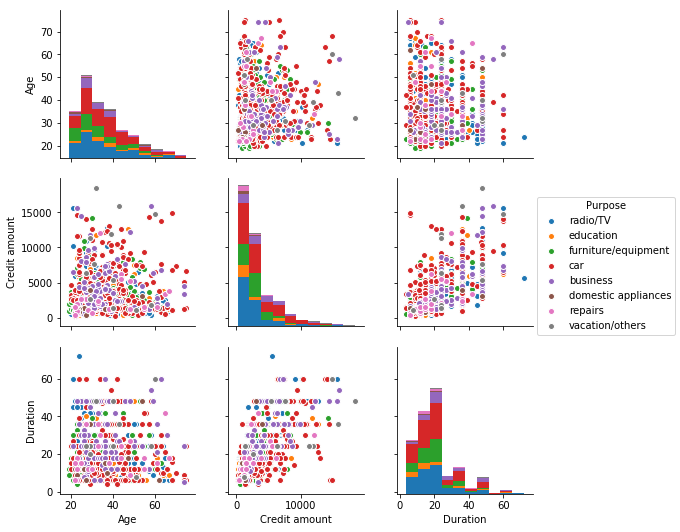

In [29]:
sns.pairplot(data[["Age", "Credit amount", "Duration", "Purpose"]], hue="Purpose", diag_kind="hist")
plt.show()

***
Dataset represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The majority who takes a credit are male that have job, having a own house, saving and checking account is little than the majority purpose they use credits is for car. 
<br>
<br>
Based on all Pair Plot we know that all numerical data is spread out and not centered on specific category. Based on correlation we know that if  when the duration increases the credit also increases.
<br>
<br>
**Maximum credit amount with purpose**

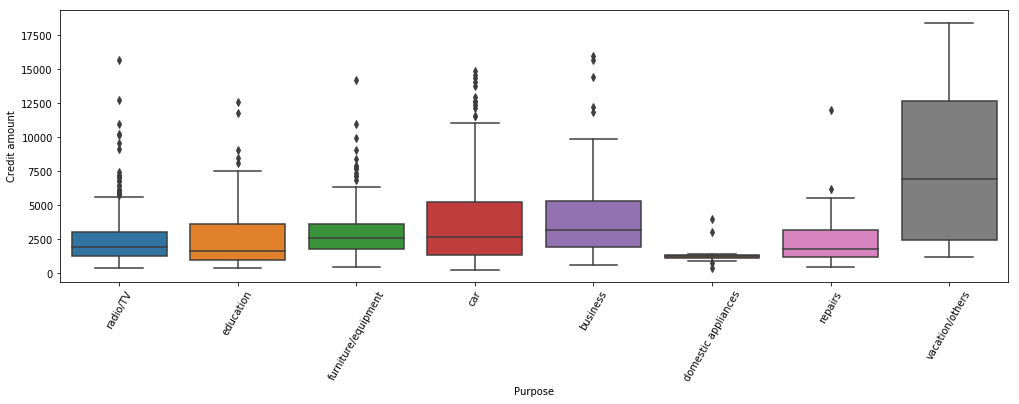

In [30]:
f=plt.figure(figsize=(17,5))
f.add_subplot(1,1,1)
sns.boxplot(y=data["Credit amount"], x=data['Purpose'])
plt.xticks(rotation=60)
plt.show()

Based on Bar Plot, we know that the majority person purpose have credits is for car. When we see Box Plot Credit Amount categorize with purpose, the highest credit amount is for  vocation/other. So we can say that vven though the majority of credit card users are to buy a car, the highest Credit Amount is for vocation / others.

***
## CLUSTERING TECHNIQUE
After we understand about the characteristics of the data, we can perform customer segmentation using clustering techniques. Based on the data, we can make Clustering using three methods :
1. K-Means
2. Hierarchical / Agglomerative
3. DBSCAN

In [187]:
# Load the Data that Already to Analyze
data.head()

,Age,Credit amount,Duration,Sex,Job,Housing,Saving accounts,Checking account,Purpose
0,67,1169,6,male,2,own,little,little,radio/TV
1,22,5951,48,female,2,own,little,moderate,radio/TV
2,49,2096,12,male,1,own,little,little,education
3,45,7882,42,male,2,free,little,little,furniture/equipment
4,53,4870,24,male,2,free,little,little,car


We have categorical values like Sex, Job, Housing, Saving Accounts, Checking  and Purpose. Before we analyze the data, we need to code the categorical data first to make visualization easily.

In [285]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=data.copy() # lets take a copy of dataframe for analysis
df.Sex=le.fit_transform(df.Sex)
df.Housing=le.fit_transform(df.Housing)
df.Job=le.fit_transform(df.Job)
df["Saving accounts"]=le.fit_transform(df["Saving accounts"])
df["Checking account"]=le.fit_transform(df["Checking account"])
df.Purpose=le.fit_transform(df.Purpose)

In [286]:
df.head()

,Age,Credit amount,Duration,Sex,Job,Housing,Saving accounts,Checking account,Purpose
0,67,1169,6,1,2,1,0,0,5
1,22,5951,48,0,2,1,0,1,5
2,49,2096,12,1,1,1,0,0,3
3,45,7882,42,1,2,0,0,0,4
4,53,4870,24,1,2,0,0,0,1


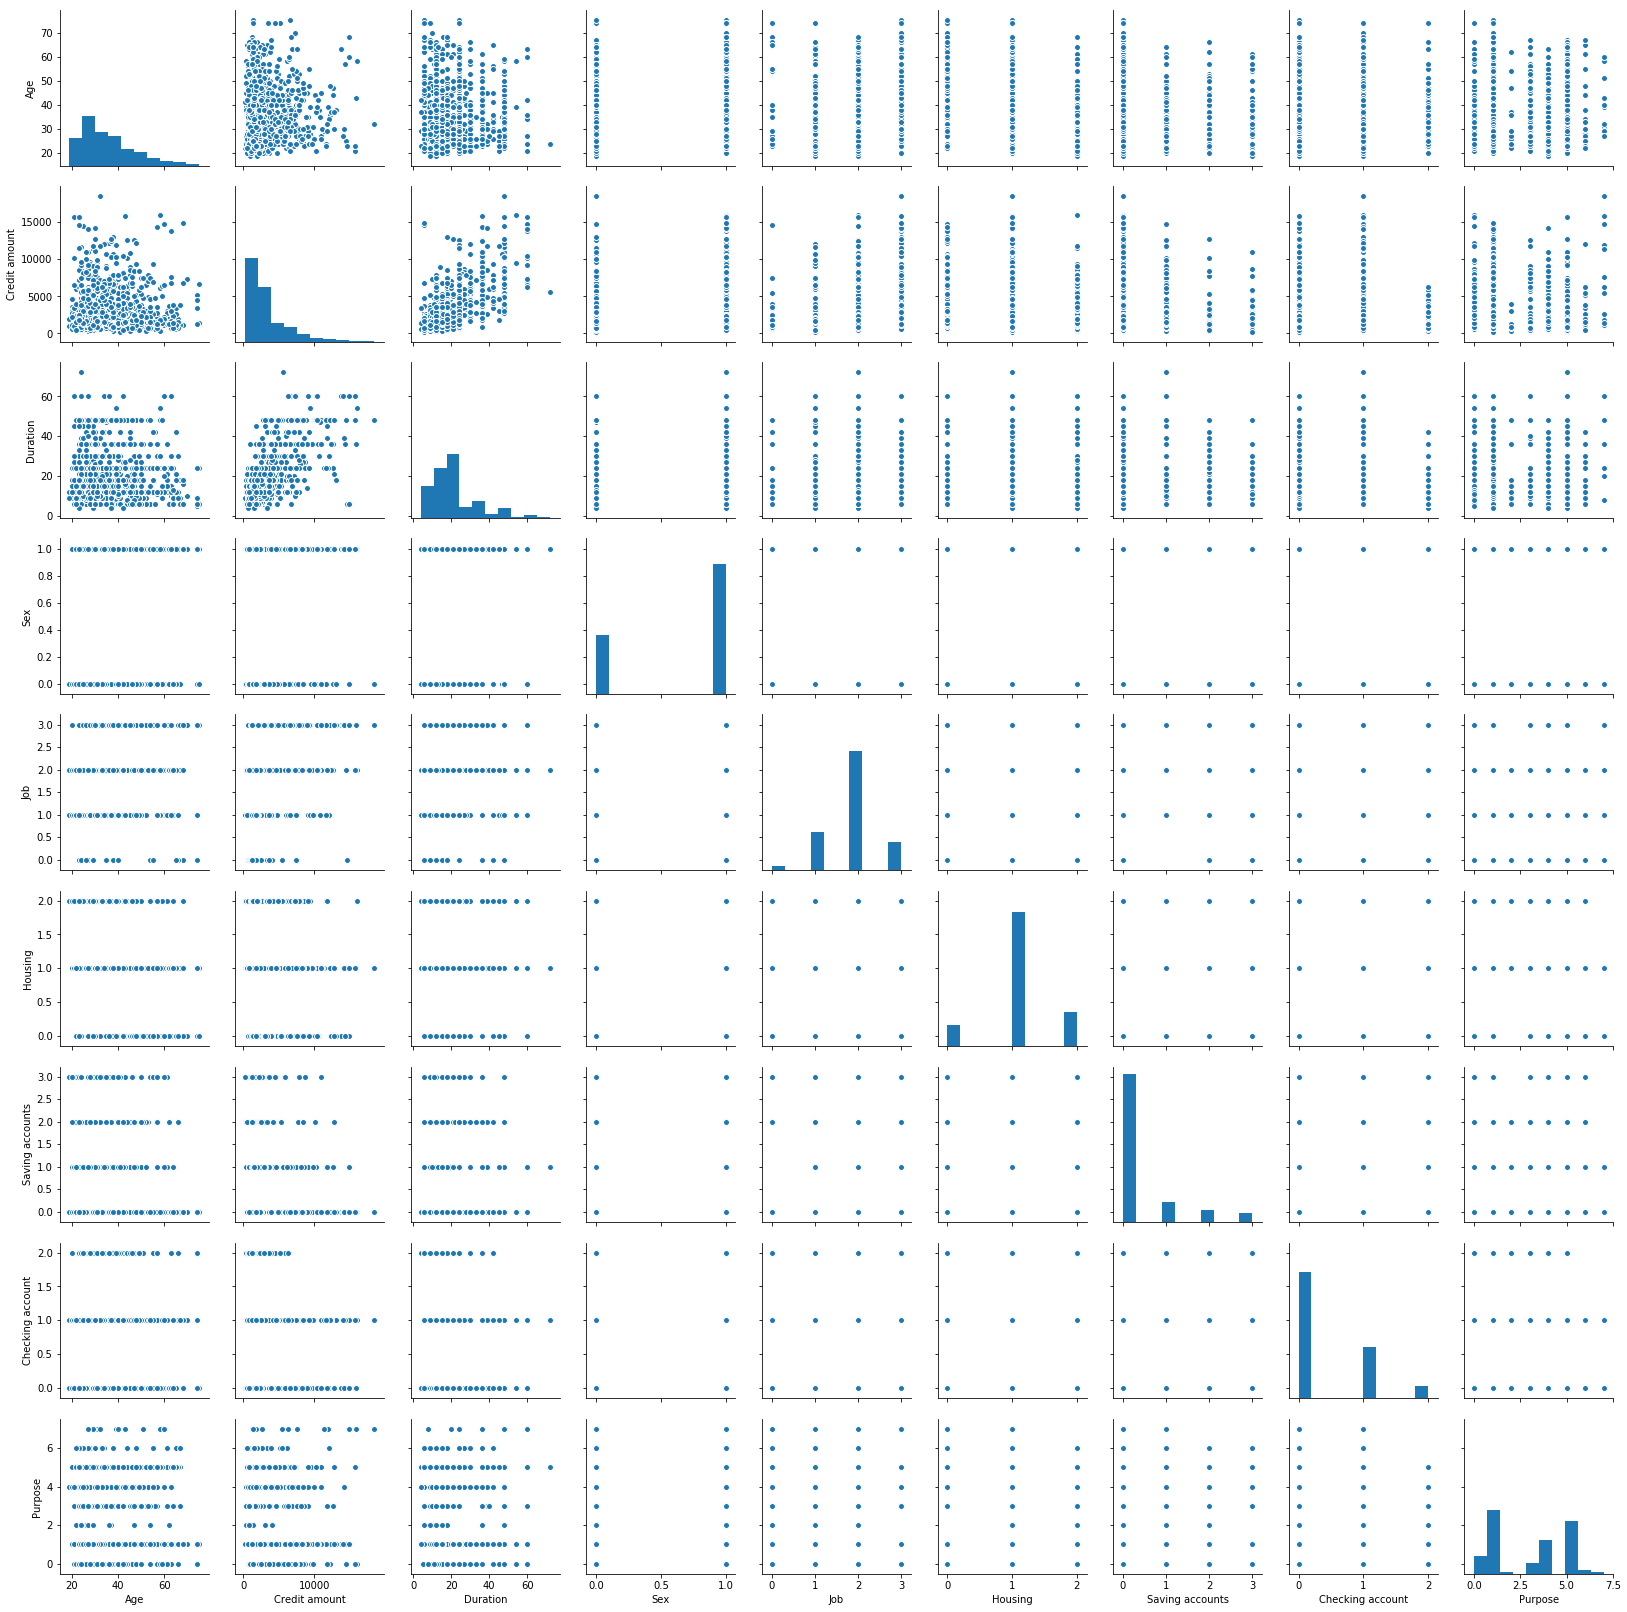

In [287]:
# Visualization All Variable
sns.pairplot(df)

**Dummies Data :**
Because of the variable consist of numerical and categorical variable, we need to make dummies for categorical data before we analyze using clustering technique.

In [288]:
# Make Dummies Variable
dfe1 = data.copy()
dfe1.drop('Saving accounts', axis = 1, inplace = True)
dfe1.Job = dfe1.Job.astype(str)
dfe1 = dfe1[[ 'Job','Sex','Age','Credit amount', 'Duration','Housing', 'Purpose']]
X = pd.get_dummies(dfe1)
X.head()

,Age,Credit amount,Duration,Job_0,Job_1,Job_2,Job_3,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1169,6,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,22,5951,48,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,49,2096,12,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
3,45,7882,42,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0
4,53,4870,24,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0


**Normalize Data :**
Because of the data have different value and the numerical data have an outlier, we need to normalize the data. 

In [289]:
# Normalize the Data
from sklearn.preprocessing import normalize
X1=normalize(X)

### 1. K-Means Method

In [290]:
# Import Package for K-Means
from sklearn.cluster import KMeans

**Find K** <br>
*Scree Plot* & *Elbow Method*

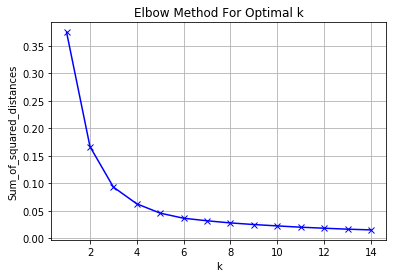

In [291]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X1)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

Based on Scree Plot, we can predict the best *K* or cluster amount is 3. We can say like that, because the range from *K* = 3 is really different from *K*=4. From *K*=4 to *K* > 4, the plot is already constant.   

*Silhouette*

In [292]:
range_n_clusters = [2, 3, 4, 5]
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters = n_cluster, max_iter =1000)
    kmeans.fit(X1)
    labels = kmeans.predict(X1)
    from sklearn.metrics import silhouette_score
    silhouette_avg = silhouette_score(X1, labels)
    print(silhouette_avg)

0.6570370694870825
0.5804442453517935
0.4910278951410303
0.47040980593929077


In [293]:
# Correlation All Variable
df.corrwith(df["Credit amount"],axis=0) #data corellation wih each other

Age                 0.032716
Credit amount       1.000000
Duration            0.624984
Sex                 0.093482
Job                 0.285385
Housing            -0.135632
Saving accounts    -0.077929
Checking account    0.006953
Purpose            -0.151720
dtype: float64

Based on *Silhouette Score*, we can see *K* = 2 is greater than others. From the another *Silhouette Score* we can see *K* equal bigger than 4 are more constant. So we can choose the best K for K-Means method is 3.
<br>
<br>
**Make Cluster using K-Means Method**

In [294]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [295]:
# Add K-Means Variable for Label Cluster from K-Means Method
df_kmeans=df.copy()
df_kmeans['K-Means'] = pd.DataFrame(kmeans.labels_)
df_kmeans.head()

,Age,Credit amount,Duration,Sex,Job,Housing,Saving accounts,Checking account,Purpose,K-Means
0,67,1169,6,1,2,1,0,0,5,0
1,22,5951,48,0,2,1,0,1,5,1
2,49,2096,12,1,1,1,0,0,3,1
3,45,7882,42,1,2,0,0,0,4,1
4,53,4870,24,1,2,0,0,0,1,1


**PCA**
<br>
Because we make cluster from more than two variable or there are to many variable that we use to make cluster, I use *Principal Component Analysis (PCA)* to interpretation easier. PCA can make new component that smaller than variablle amount. Using the new component, they alredy consist of all variable (with percantage).   

In [296]:
# Running PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [297]:
# Make Dataframe from Data that Alredy in Dummies + K-Means Variable
X2=df_kmeans.copy()
X2['K-Means'] = pd.DataFrame(kmeans.labels_)

In [298]:
finalresult = pd.concat([principalDf, X2], axis = 1)

In [299]:
pca.explained_variance_ratio_

array([9.46013974e-01, 5.04061218e-02, 7.33304144e-04])

From PCA, we can know :  <br>All variable already describe by PC 1 (94%). That percentage is really near to 100%. We can say that PC 1 already can describe all variable.

In [300]:
# Import 3D Graph
from mpl_toolkits.mplot3d import Axes3D

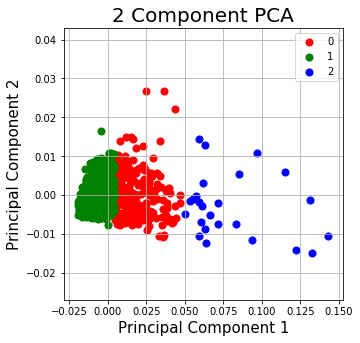

In [301]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalresult['K-Means'] == target
    ax.scatter(finalresult.loc[indicesToKeep, 'principal component 1']
               , finalresult.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

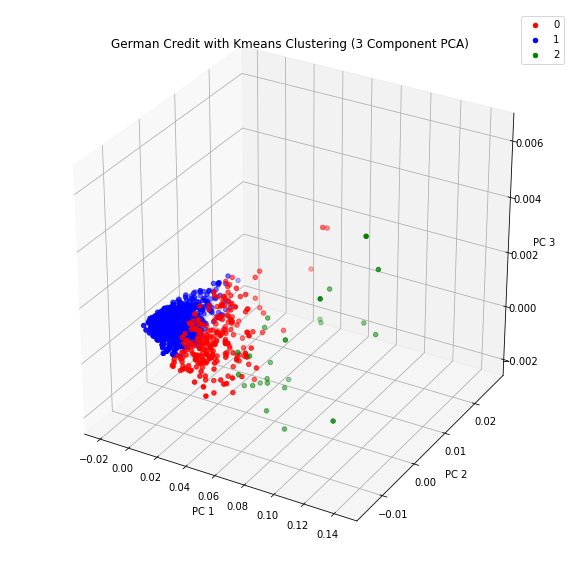

In [302]:
# Visualization of centroid
x = finalresult['principal component 1']
x1 = finalresult['principal component 2']
x2 = finalresult['principal component 3']
group= kmeans.labels_
color = ['red','blue','green']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(kmeans.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
    #ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],color='black')
ax.legend()
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.title("German Credit with Kmeans Clustering (3 Component PCA)")
plt.show()

From PCA we can make 3 cluster for a person who takes a credit by a bank. We can indicating the 3 clusters are : High, Medium and Good Risk.
<br>
<br>
**Visualization Cluster**
<br>
Because of we make cluster from all variable, we can visualization our cluster using **Pair Plot**. So we can know what variables that really make influence the cluster.

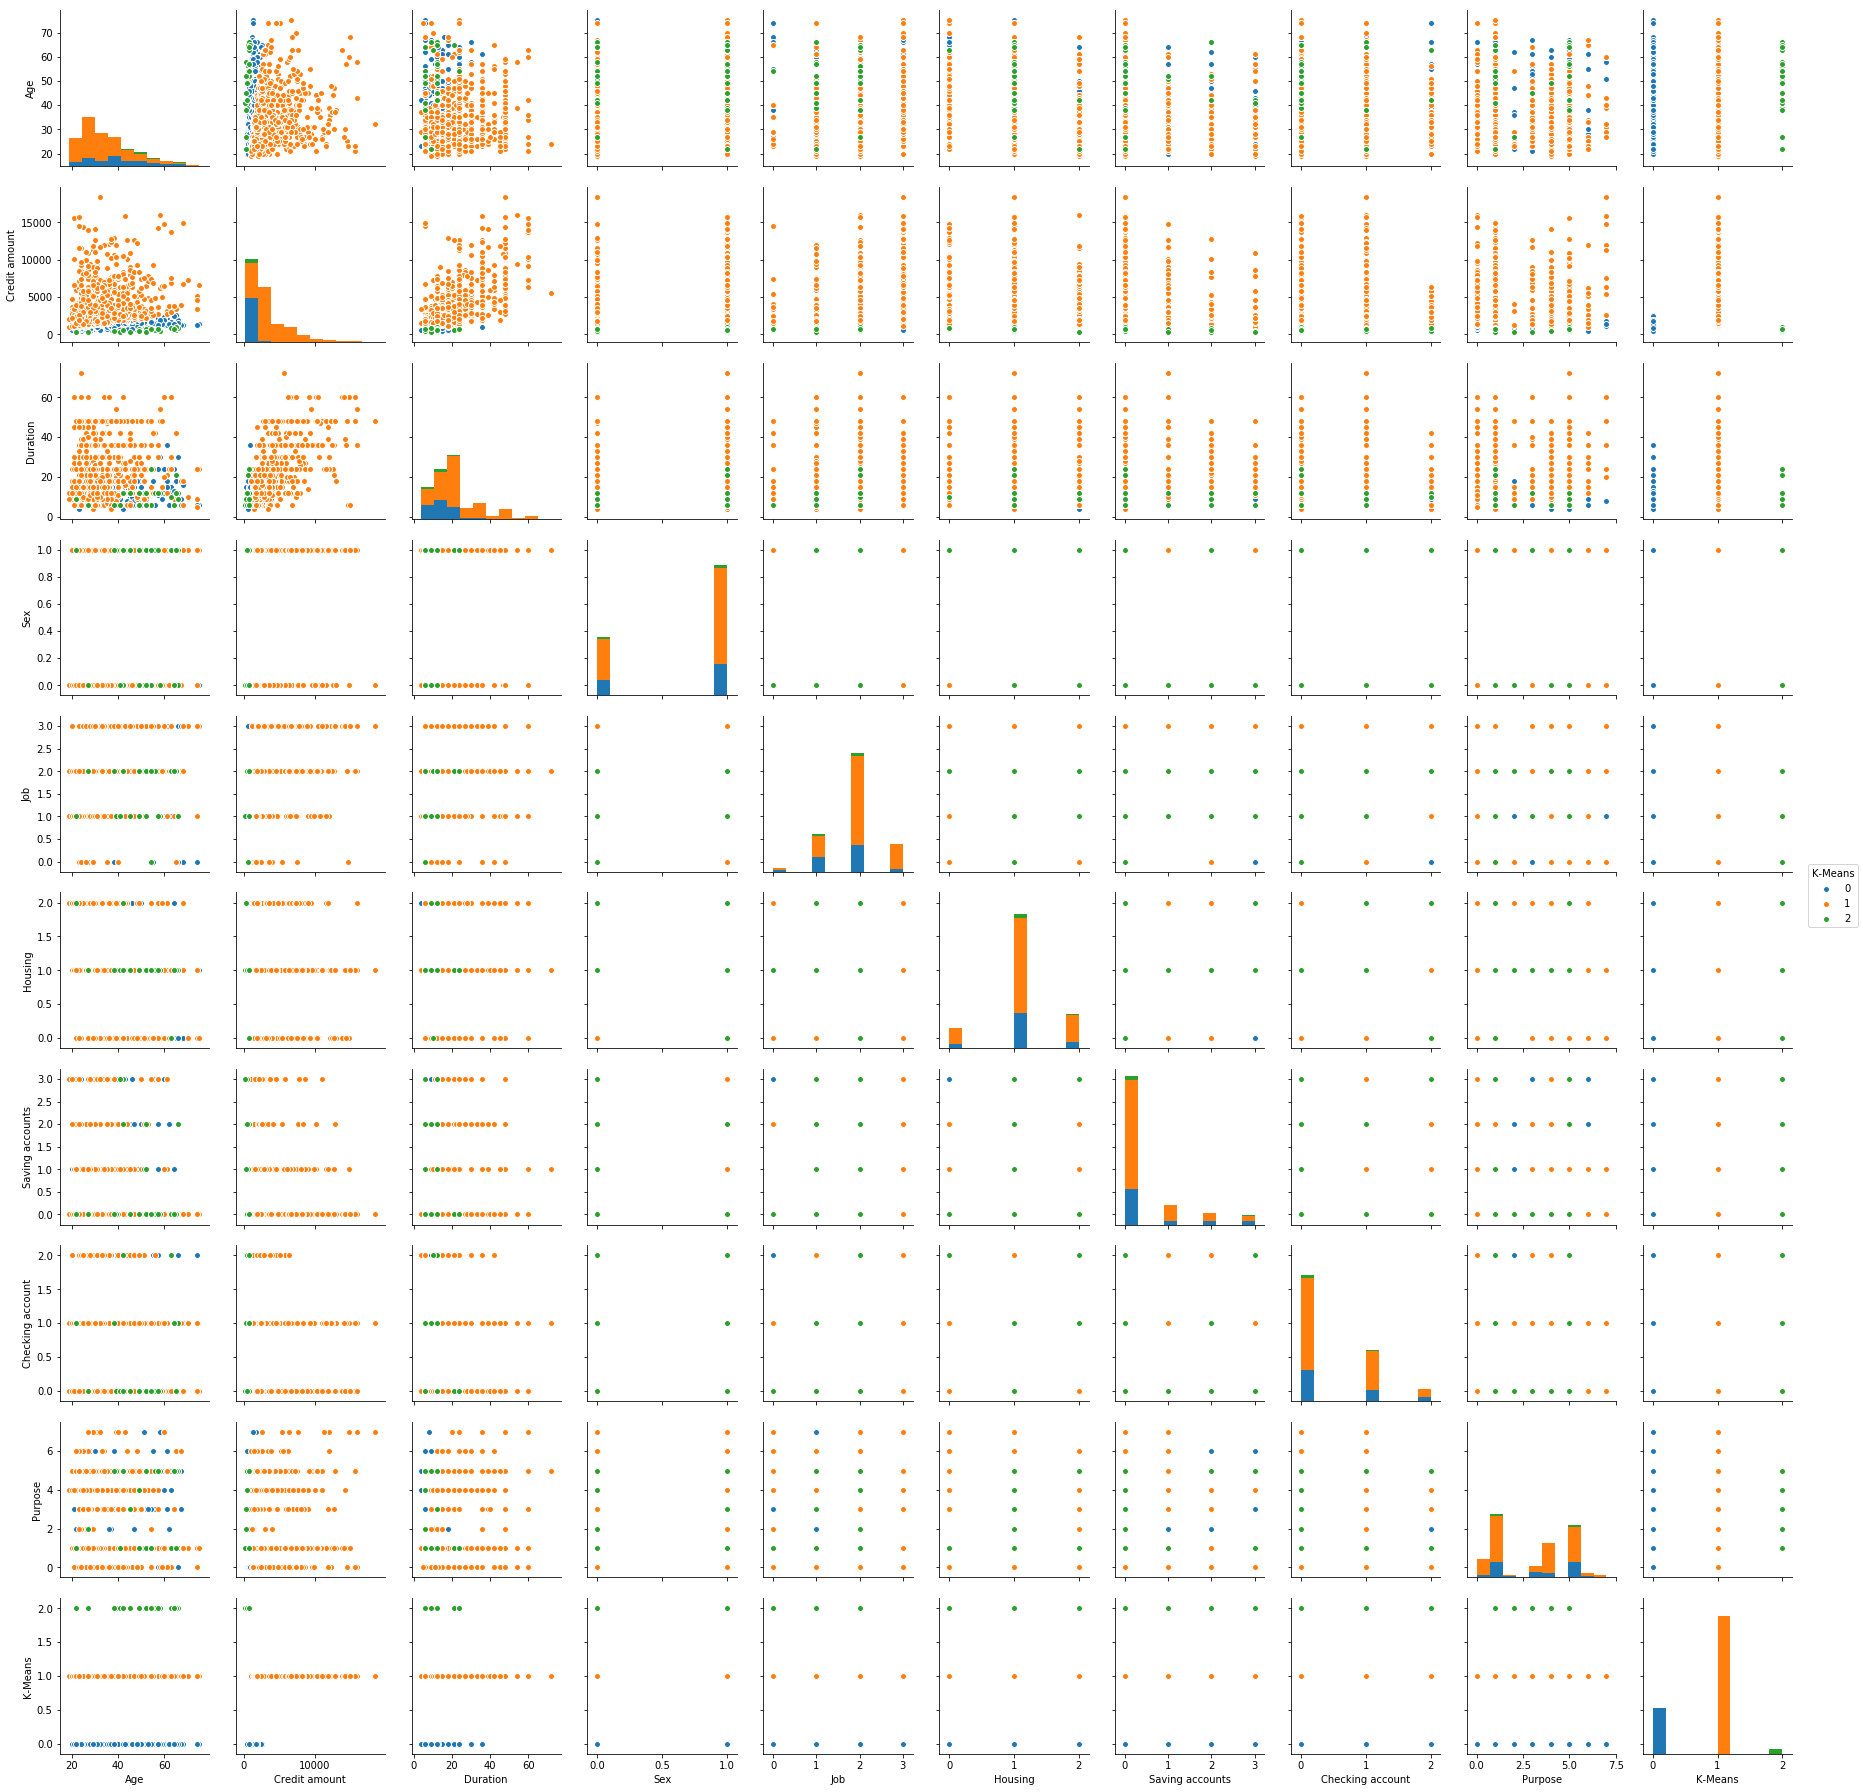

In [311]:
# Visualization Each Numerical Variable based on K-Means Cluster
df_kmeans_num=df.copy()
df_kmeans_num['K-Means'] = pd.DataFrame(kmeans.labels_)
sns.pairplot(df_kmeans_num, hue='K-Means', diag_kind='hist')
plt.figure(figsize=(10,10))
plt.show()

From the visualization, we can know that :
<br> From the entire of the costumer, many people entered the orange cluster or we can say cluster 1. We can see based on Bar Plot, the orange group have a bigger amount than the other. The orange cluster can be categorize as High Cluster. We can say like that, because when we see the Scatter Plot between 'Credit Amount' and 'Duration'
<br>
After seeing the Pair Plots that have been grouped based on the formed clusters, it can be seen that the Scatter Plot forms a clear segmentation pattern on the Scatter Plot

### 2. Hierarchical / Agglomerative Cluster

In [93]:
# Import Package for Hierarchical
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

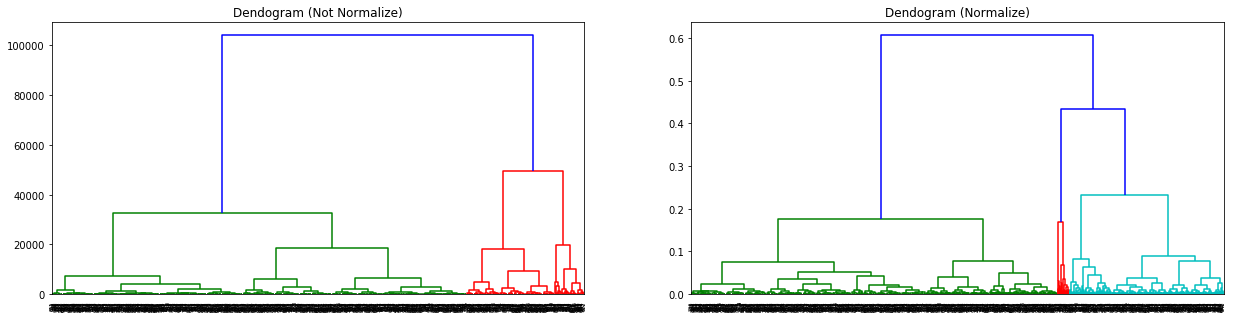

In [306]:
f=plt.figure(figsize=(21,5))
f.add_subplot(1,2,1)
plt.title('Dendogram (Not Normalize)')
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
f.add_subplot(1,2,2)
plt.title('Dendogram (Normalize)')
dendrogram = sch.dendrogram(sch.linkage(X1, method='ward'))

From the dendrogram we can know that there are 3 cluster, which is data that already normalize or not.

In [314]:
# Fitting hierarchical clustering 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X1)
labels = model.labels_

In [315]:
# Add Hierarchival Variable 
df_cluster['Hierarchical'] = pd.DataFrame(model.labels_)
df_cluster.head()

,Age,Credit amount,Duration,Sex,Job,Housing,Saving accounts,Checking account,Purpose,K-Means,Hierarchical
0,67,1169,6,1,2,1,0,0,5,0,0
1,22,5951,48,0,2,1,0,1,5,1,1
2,49,2096,12,1,1,1,0,0,3,1,0
3,45,7882,42,1,2,0,0,0,4,1,1
4,53,4870,24,1,2,0,0,0,1,1,1


From K-Means and Hierarchical variable, there are some diffrent cluster for each person. But when we see the pair plot, we can see like this

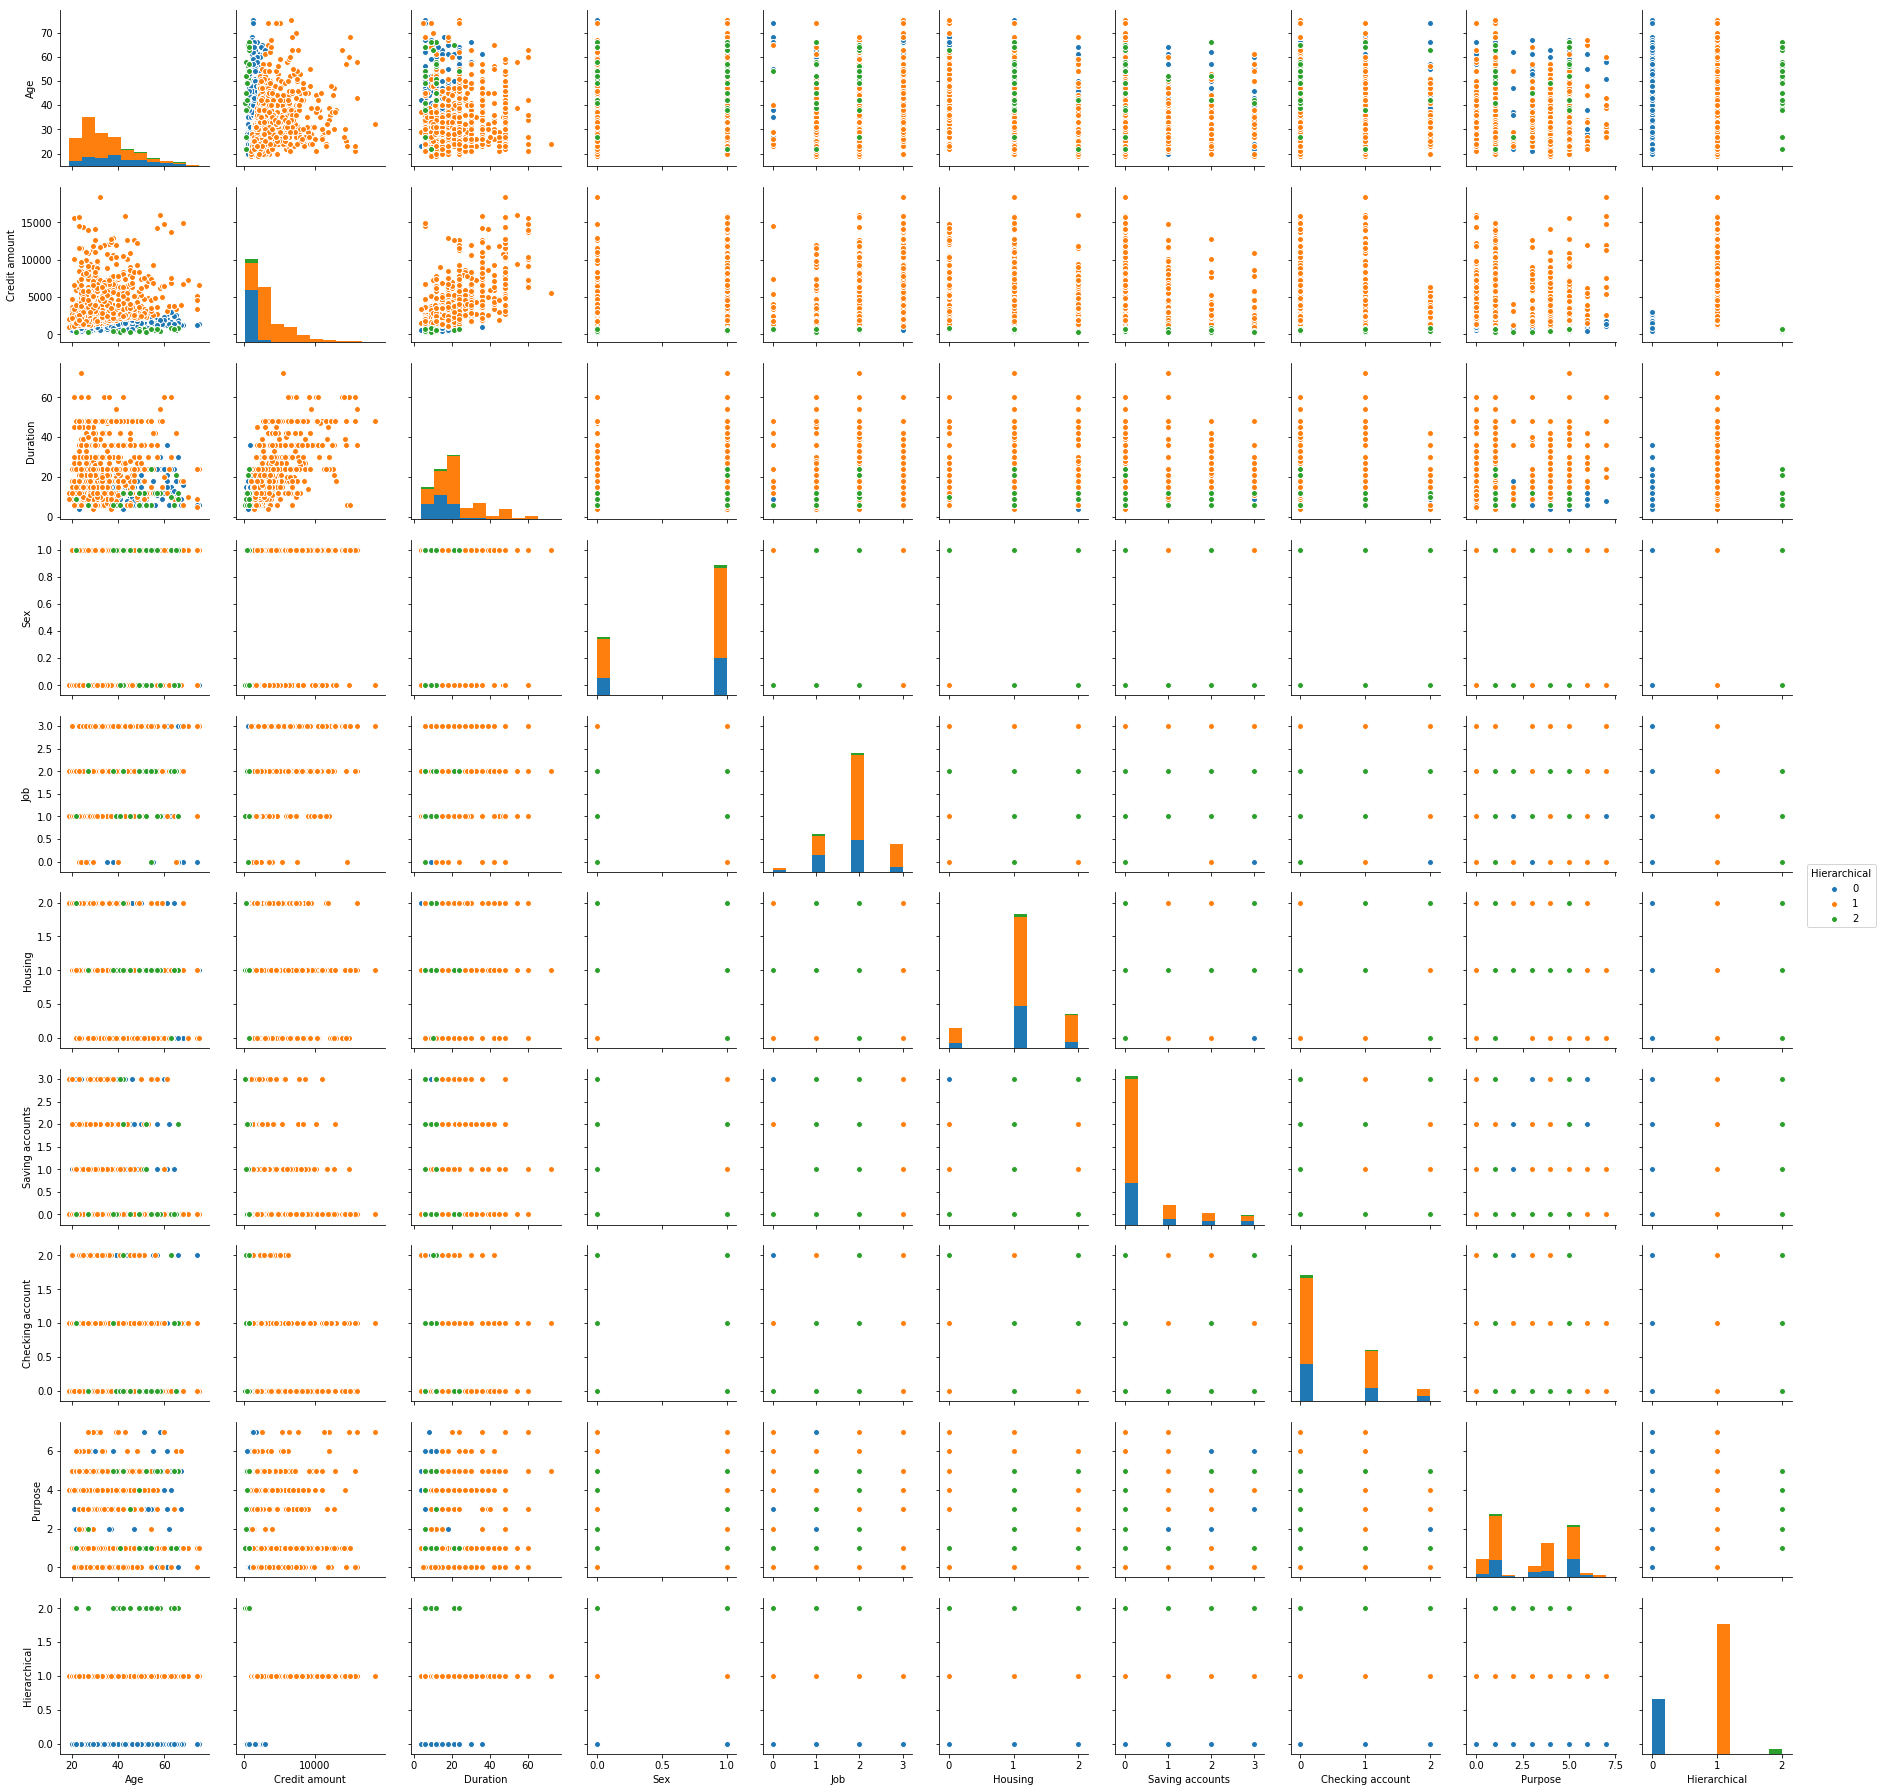

In [316]:
# Visualization Each Variable based on Hierarchical Cluster
df_kmeans_num=df.copy()
df_kmeans_num['Hierarchical'] = pd.DataFrame(model.labels_)
sns.pairplot(df_kmeans_num, hue='Hierarchical', diag_kind='hist')
plt.figure(figsize=(10,10))
plt.show()

### 3. DBSCAN

In [317]:
# Import Package for DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import datasets

In [326]:
dbscan = DBSCAN(eps=0.005, min_samples=5)
dbscan.fit(X1)

DBSCAN(algorithm='auto', eps=0.005, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [327]:
df_cluster['DBSCAN'] = pd.DataFrame(dbscan.labels_)
df_cluster.head()

,Age,Credit amount,Duration,Sex,Job,Housing,Saving accounts,Checking account,Purpose,K-Means,Hierarchical,DBSCAN
0,67,1169,6,1,2,1,0,0,5,0,0,0
1,22,5951,48,0,2,1,0,1,5,1,1,0
2,49,2096,12,1,1,1,0,0,3,1,0,0
3,45,7882,42,1,2,0,0,0,4,1,1,0
4,53,4870,24,1,2,0,0,0,1,1,1,0


In [328]:
df_cluster['DBSCAN'] = pd.DataFrame(dbscan.labels_)
df_cluster.head()

,Age,Credit amount,Duration,Sex,Job,Housing,Saving accounts,Checking account,Purpose,K-Means,Hierarchical,DBSCAN
0,67,1169,6,1,2,1,0,0,5,0,0,0
1,22,5951,48,0,2,1,0,1,5,1,1,0
2,49,2096,12,1,1,1,0,0,3,1,0,0
3,45,7882,42,1,2,0,0,0,4,1,1,0
4,53,4870,24,1,2,0,0,0,1,1,1,0


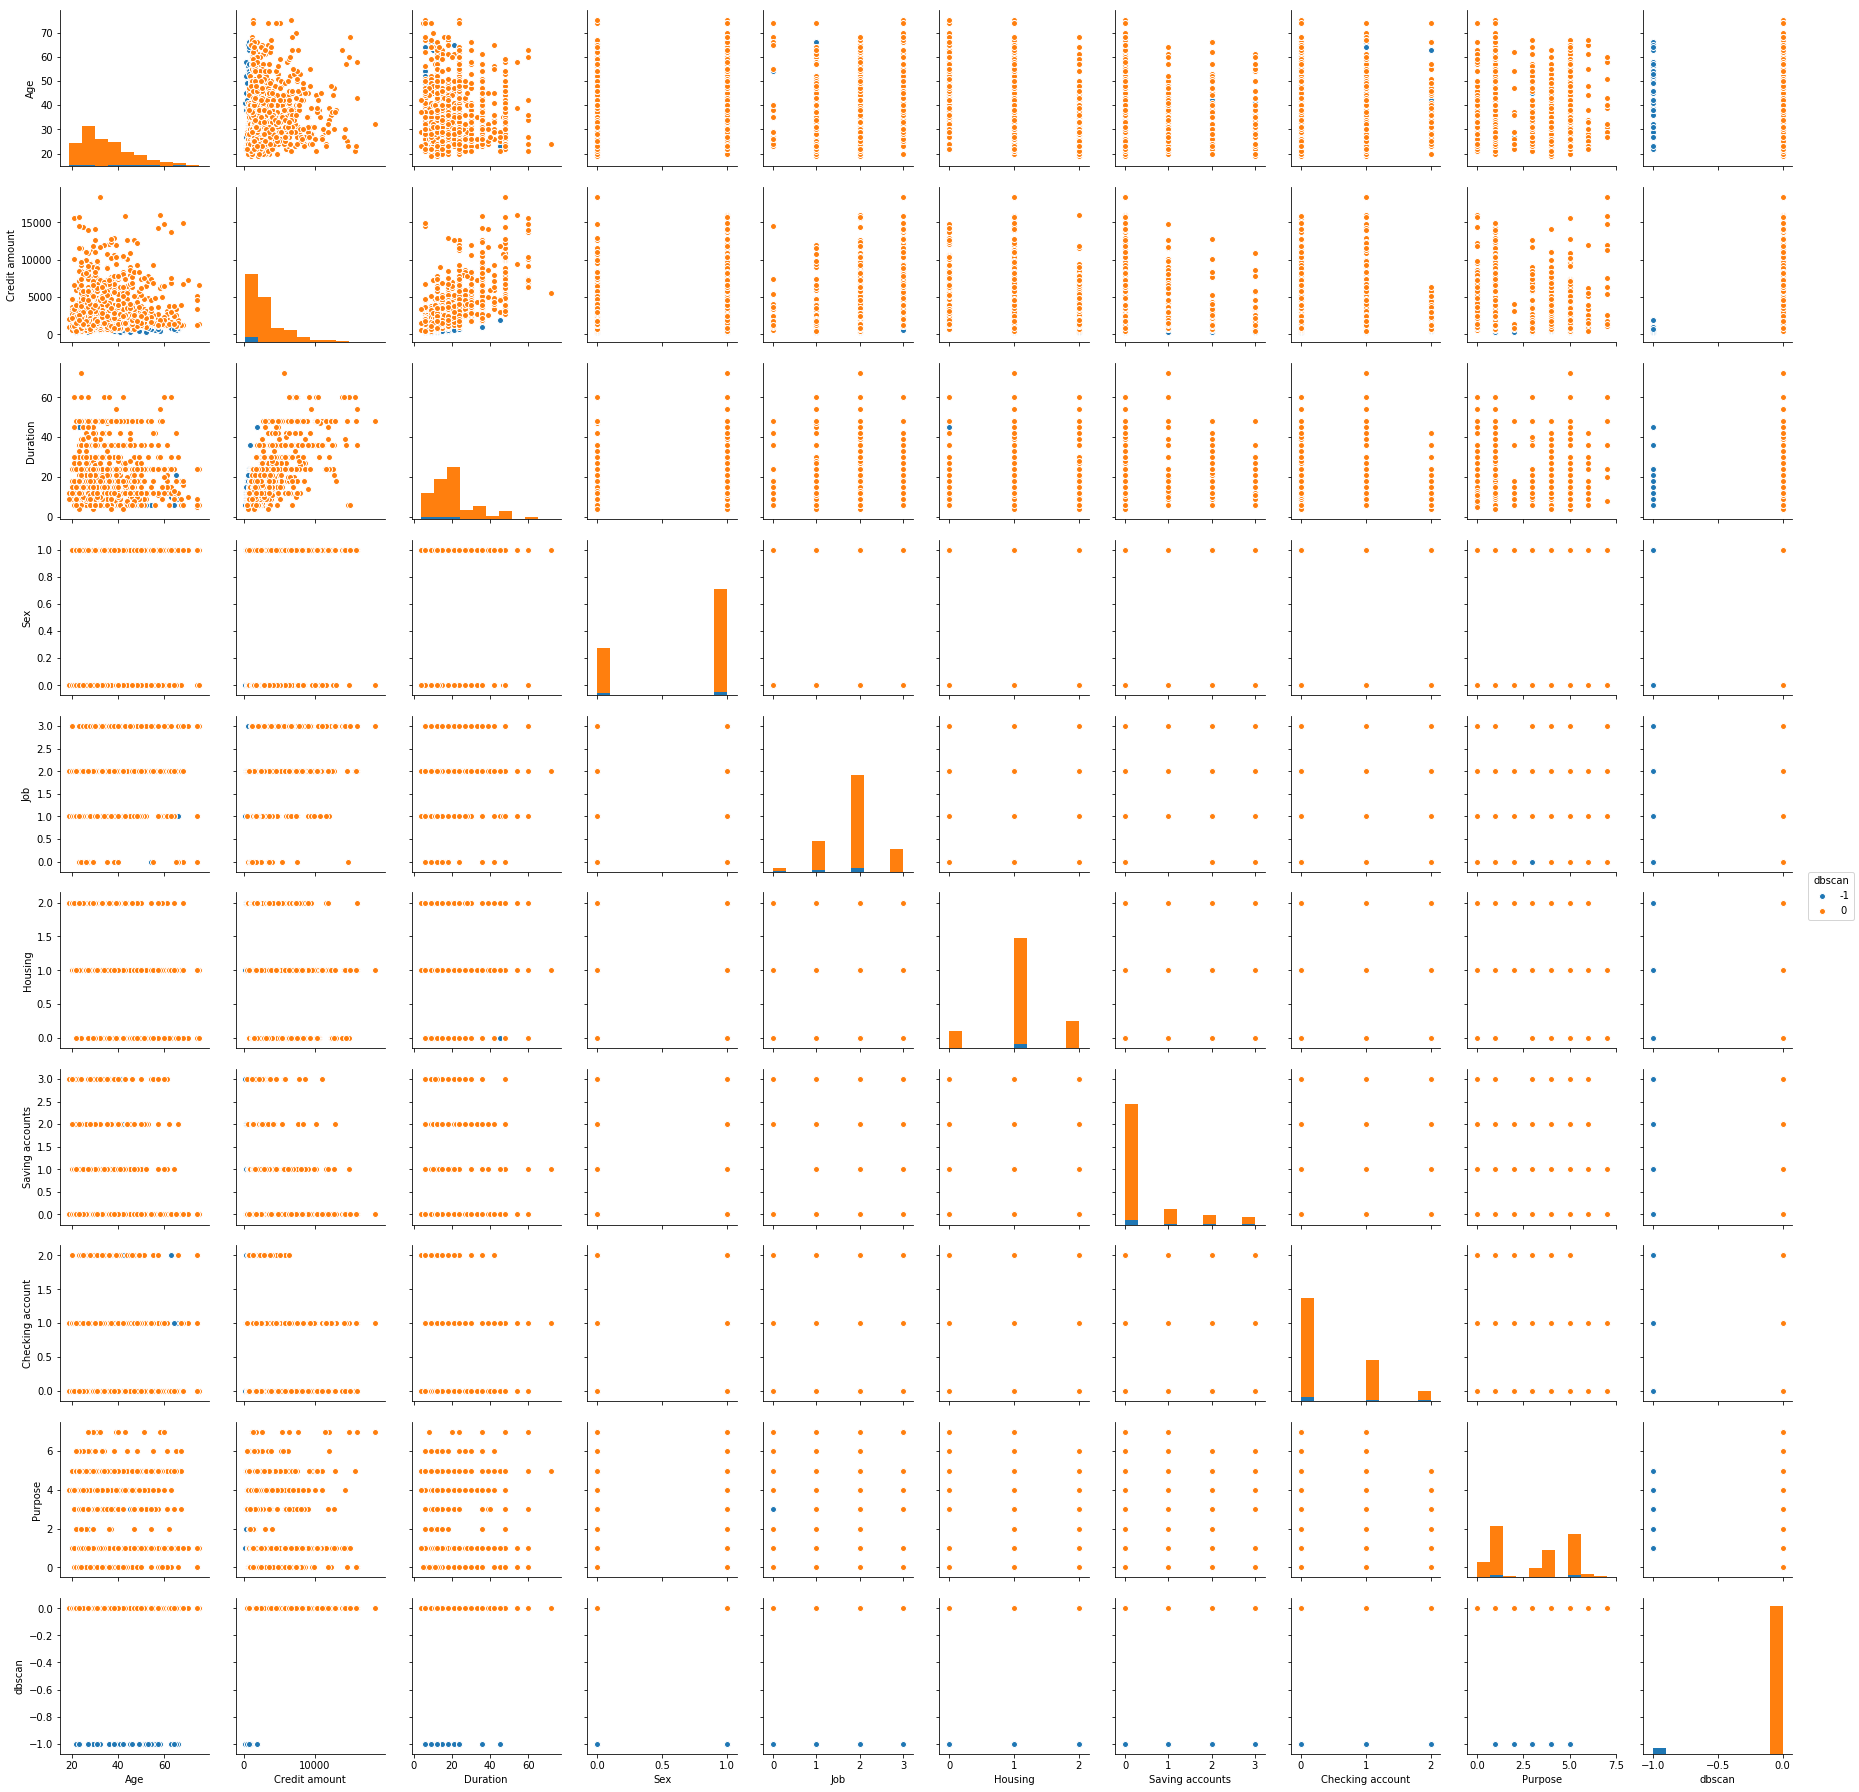

In [329]:
# Visualization Each Variable based on DBSCAN Cluster
df_dbscan=df.copy()
df_dbscan['dbscan'] = pd.DataFrame(dbscan.labels_)
sns.pairplot(df_dbscan, hue='dbscan', diag_kind='hist')
plt.figure(figsize=(10,10))
plt.show()

***
## RESULT
Based on the overall analysis it can be said that: From  3 Clustering Techniques, we can define the best cluster amount are 3. That amount we get from K-Means and Hierarchical Techniques.
1. Cluster 1 : Bad Risk<br>
Based on K-Means and Hierarchical Clusters, it can be seen that cluster 2 (Green Color in Plot) is a High Risk Cluster. Or we can say that, the high cluster is Bad Risk.  for people who have high Credit Amount and Duration. For other variables, this cluster is spread evenly.
2. Cluster 2 : Medium Risk<br>
Based on K-Means and Hierarchical Clusters, it can be seen that cluster 1 (Orange Color in Plot) is a Medium Risk Cluster. This cluster is really dominant.
3. Cluster 3 : Good Risk<br>
Based on K-Means and Hierarchical Clusters, it can be seen that cluster 0 (Blue Color in Plot) is a Good Risk Cluster. This cluster is not really much in the data.


After we find that cluster, we can say that variables that have the highest correlation between variables are Credit Amount and Duration variables. The two pairs of variables are one of the pairs that have a correlation of more than 50%. After knowing the number of clusters, it can be seen that the higher the Credit Amaunt and Duration, the customer can be categorized into the Bad Risk Cluster. So customers like this should be avoided or considered so as not to harm the company. As for the Medium Risk cluster, it must be ensured that it does not become a Bad Risk customer. And for customers who enter into Good Risk must be provided with good service in order to be loyal in the company

### Affinity

In [162]:
from sklearn.cluster import AffinityPropagation

In [177]:
clustering = AffinityPropagation().fit(X1)
clustering 
AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

In [178]:
df_cluster['AFFINITY'] = pd.DataFrame(clustering.labels_)
df_cluster.head()

,Age,Credit amount,Duration,Sex,Job,Housing,Saving accounts,Checking account,Purpose,agglomerative,K-Means,Hierarchical,DBSCAN,AFFINITY
0,67,1169,6,1,2,1,0,0,5,0,1,0,-1,9
1,22,5951,48,0,2,1,0,1,5,2,0,1,0,25
2,49,2096,12,1,1,1,0,0,3,0,0,0,0,35
3,45,7882,42,1,2,0,0,0,4,2,0,1,0,25
4,53,4870,24,1,2,0,0,0,1,2,0,1,0,4


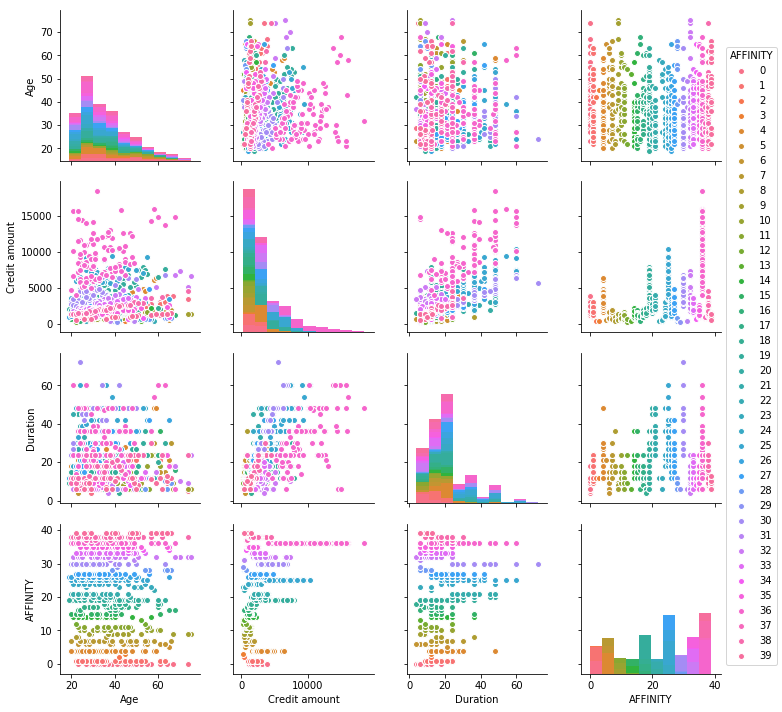

In [180]:
df_kmeans_num1=numerical.copy()
df_kmeans_num1['AFFINITY'] = pd.DataFrame(clustering.labels_)
sns.pairplot(df_kmeans_num1, hue='AFFINITY', diag_kind='hist')
plt.show()